# Statistical Programming Python
## Energy in Spain_Individual Assignment
### Frederico Ferreira Andrade - MBD2


The "energy.csv" dataset contains timeseries regarding the power market in Spain.

Explanation of columns:
* datetime: moment at which the observation happened, in UTC (https://en.wikipedia.org/wiki/Coordinated_Universal_Time)
* power_demand: total consumption of electricity in MWh (MegaWatt-hours) [consumption]
* nuclear: total energy generated in nuclear power plants in MWh [power generation]
* gas: total energy generated in gas powered plants in MWh [power generation]
* solar: total energy generated in solar farms in MWh [power generation]
* hydro: total energy generated in hydro dams in MWh [power generation]
* coal: total energy generated in coal powered plants in MWh [power generation]
* wind: total energy generated in wind farms in MWh [power generation]
* spot_price: price at which the energy is sold (generation) or bought (consumption) in €/MWh [price]

### Import needed libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline

### Get the data as a pandas Dataframe

In [27]:
EnergyDF = pd.read_csv('energy.csv', sep =',')
display(type(EnergyDF))
EnergyDF.describe()


pandas.core.frame.DataFrame

,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price
count,8737.000000,8737.000000,8737.000000,6345.000000,8737.000000,8588.000000,8737.000000,8737.000000
mean,28512.653474,6381.835069,5924.323967,1399.224240,2803.288108,1263.865137,6072.172588,47.705993
std,4566.831233,825.163584,3180.671191,1334.539134,1609.319482,1312.005015,3497.963836,10.882271
min,16969.100000,3948.400000,388.900000,0.100000,443.300000,50.000000,353.000000,0.030000
25%,24662.600000,5963.100000,3255.800000,13.200000,1602.000000,515.000000,3363.600000,42.010000
50%,28763.700000,6908.000000,5739.400000,1160.800000,2401.700000,765.000000,5300.900000,48.990000
75%,31980.800000,7015.600000,8400.100000,2636.700000,3605.700000,1262.375000,8178.500000,54.540000
max,40094.800000,7129.100000,15082.300000,4213.100000,8346.600000,6327.900000,17768.700000,74.740000


### Calculate the following

#### Shape (1 p)

In [28]:
EnergyDF.shape

(8737, 9)

#### Create a list called "features" containing all the columns that are not "datetime" (1 p)

In [29]:
# use filter or list comprehensions or for loops or dark magic
features = [col for col in EnergyDF.columns if "datetime" not in col]
print(features)
display(type(features))

['power_demand', 'nuclear', 'gas', 'solar', 'hydro', 'coal', 'wind', 'spot_price']


list

#### How many NaN are there in the dataset? (1 p)

In [30]:
# "Dealing with missing values" in the slides
print("NA's per column:")
display(EnergyDF.isnull().sum())
print("Total amount of NA's:")
display(EnergyDF.isnull().sum().sum())


NA's per column:


datetime           0
power_demand       0
nuclear            0
gas                0
solar           2392
hydro              0
coal             149
wind               0
spot_price         0
dtype: int64

Total amount of NA's:


2541

#### Convert the "datetime" column into a Series containing datetime objects (0.5 p)

Pass utc=True as argument to your function of choice *cough* pd.to_dat... *cough*

In [31]:
# pandas datetime functionalities
EnergyDF['datetime'] = pd.to_datetime(EnergyDF['datetime'], utc=True)
EnergyDF['datetime'].dtype

datetime64[ns, UTC]

#### Create the following columns (0.5 p)
* year
* month
* day
* hour
* weekday

In [32]:
# pandas datetime functionalities
EnergyDF['year'] = EnergyDF.datetime.dt.year
EnergyDF['month'] = EnergyDF.datetime.dt.month
EnergyDF['day'] = EnergyDF.datetime.dt.day
EnergyDF['hour'] = EnergyDF.datetime.dt.hour
EnergyDF['weekday'] = EnergyDF.datetime.dt.weekday


EnergyDF.sample(5)

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday
5001,2019-07-28 08:00:00+00:00,24862.8,6916.6,6584.5,2612.6,1426.7,607.0,2878.6,43.02,2019,7,28,8,6
2727,2019-04-24 14:00:00+00:00,30832.8,7038.5,815.0,1693.1,2011.5,672.0,14838.4,31.61,2019,4,24,14,2
1871,2019-03-19 22:00:00+00:00,26944.7,7087.5,2281.5,4.4,2337.5,955.8,8025.7,51.33,2019,3,19,22,1
1382,2019-02-27 13:00:00+00:00,31834.1,7102.6,3332.0,3368.3,2162.3,4479.9,3606.6,53.15,2019,2,27,13,2
4578,2019-07-10 17:00:00+00:00,33786.2,6932.2,11584.6,1400.2,1954.0,1045.0,3388.6,53.92,2019,7,10,17,2


#### Create a "weekend" column containing True if day is Sat/Sun or False if day is Mon/Tue/... (1 p)

In [34]:
# feature engineering
# use your already beloved (map + lambda functions)
# or list comprehensions
EnergyDF["weekend"] = np.where(EnergyDF["weekday"] < 5, False, True)
EnergyDF.sample(5)

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday,weekend
4919,2019-07-24 22:00:00+00:00,30397.5,6927.4,11126.9,NaN,1336.9,1445.0,5941.3,50.68,2019,7,24,22,2,False
397,2019-01-17 12:00:00+00:00,37360.8,7101.8,8845.1,1631.4,2733.7,6102.5,4406.4,67.01,2019,1,17,12,3,False
7613,2019-11-14 04:00:00+00:00,24044.1,4063.0,3884.5,NaN,3311.7,908.2,12298.9,38.23,2019,11,14,4,3,False
1113,2019-02-16 08:00:00+00:00,29506.8,6608.6,1853.2,1164.6,3664.0,2997.2,5410.2,54.60,2019,2,16,8,5,True
7142,2019-10-25 13:00:00+00:00,29844.2,5976.3,7439.2,3736.8,1629.5,1046.2,3969.9,44.50,2019,10,25,13,4,False


#### Calculate the average values per weekday for the columns in "features" list (1 p)

In [35]:
# features is the list you created in the beginning
average_values = EnergyDF.groupby("weekday").mean()[features]
average_values

,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price
weekday,,,,,,,,
0,29207.582306,6390.911769,6483.540032,1382.902420,2919.916173,1282.017737,5846.823379,49.239688
1,29760.259375,6391.128526,6716.402003,1400.603377,2870.550401,1478.384477,5795.669712,50.202580
2,29814.897436,6399.605689,6448.102244,1386.101098,2856.419471,1444.195997,6451.173798,48.811442
3,29913.133253,6408.186458,6404.798397,1396.425420,2904.324439,1364.827287,6452.391747,48.817388
4,29587.505689,6404.227003,6362.183894,1437.464229,3027.978526,1294.994618,6071.198638,48.785793
5,26545.257933,6325.359535,4965.318109,1418.782988,2604.202644,1057.801583,5826.916346,45.429864
6,24759.381490,6353.419231,4089.475000,1373.876790,2439.531651,912.083292,6061.215064,42.653966


#### Create a function that returns the season out of a datetime object (0.5 p)
Use that function to create a "season" column

In [37]:
def get_season(date_to_convert):
    year = date_to_convert.year
    seasons = [
        ("winter", date(year, 12, 21), date(year, 12, 31)),
        ("summer", date(year, 6, 21), date(year, 9, 20)),
        ("fall", date(year, 9, 21), date(year, 12, 20)),
        ("winter", date(year, 1, 1), date(year, 3, 20)),
        ("spring", date(year, 3, 21), date(year, 6, 20))
    ]
    
    for season in seasons:
        if date_to_convert>=season[1] and date_to_convert<=season[2]:
            return season[0]
        
EnergyDF["season"] = EnergyDF["datetime"].map(get_season)


EnergyDF.sample(5)

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday,weekend,season
3200,2019-05-14 07:00:00+00:00,30331.6,5092.1,7150.5,1914.2,3085.3,580.0,3808.9,54.82,2019,5,14,7,1,False,spring
992,2019-02-11 07:00:00+00:00,34123.3,7112.9,6077.3,121.7,4461.0,3047.0,4692.5,64.03,2019,2,11,7,0,False,winter
1391,2019-02-27 22:00:00+00:00,28203.4,7112.4,2913.1,1.0,2683.0,4389.1,4175.1,55.33,2019,2,27,22,2,False,winter
7845,2019-11-23 20:00:00+00:00,30554.9,4999.5,3004.2,2.9,4905.9,574.3,13050.4,48.90,2019,11,23,20,5,True,fall
2671,2019-04-22 06:00:00+00:00,23865.7,7035.6,5090.0,320.1,2761.5,631.0,2222.8,58.00,2019,4,22,6,0,False,spring


#### Calculate average demand and spot_price for each season (1 p)

In [38]:
EnergyDF.groupby('season')['power_demand', 'spot_price'].mean()


,power_demand,spot_price
season,,
fall,28212.959478,43.511058
spring,27112.771332,48.808877
summer,29269.888179,46.598832
winter,29482.937623,51.997609


#### Why are there so many NaN values in the "solar" column? (0.5 p - extra)

In [39]:
df_solar = EnergyDF[df.solar.isnull()]
display(df_solar.shape)

print("Solar energy is the light and/or heat energy coming from the sun. Therefore, for this power to be generated, it depends on the presence of the sun. If not, the solar panels won't generate any power(!), but due to energy collection in storage systems, stored energy can be used during cloudy weather.")


(2392, 16)

Solar energy is the light and/or heat energy coming from the sun. Therefore, for this power to be generated, it depends on the presence of the sun. If not, the solar panels won't generate any power(!), but due to energy collection in storage systems, stored energy can be used during cloudy weather.


#### Calculate the total income for each type of power generation and total costs for consumption (4 p) 
Return a dictionary like the following one:

{ "consumption": cost_consumption, "wind": income_wind, "solar": income_solar, "gas": income_gas, ...} 

In [40]:
# Income = energy_generated * price
# Cost = energy_bought * price

totconsumption_income = {}
energytype = [type for type in features if type != 'spot_price']

for col in energytype:
    totconsumption_income[col] = np.sum(df[col] * EnergyDF['spot_price'])

totconsumption_income

{'power_demand': 12115827296.223999,
 'nuclear': 2674992442.1679997,
 'gas': 2577997502.639,
 'solar': 430157479.785,
 'hydro': 1179143190.696,
 'coal': 591516973.36,
 'wind': 2412917661.565}

#### Create two plots: (2 p)
* Hourly average power demand
* Hourly average spot price

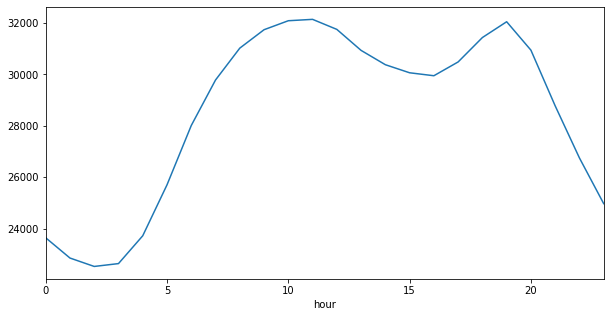

In [41]:
EnergyDF.groupby('hour').mean()['power_demand'].plot(figsize=(10, 5))

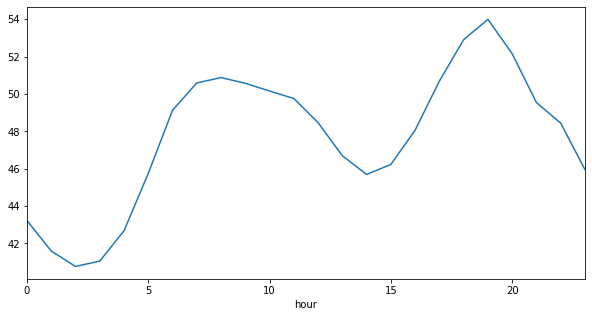

In [42]:
EnergyDF.groupby('hour').mean()['spot_price'].plot(figsize=(10,5))

#### Create a categorical variable called "wind_category" using the "wind" column (2 p)
Create 3 categories: low, mid, high

In [43]:
EnergyDF['wind_category'] = pd.cut(df.wind, bins=3, labels=['low', 'mid', 'high'])
EnergyDF.sample(5)

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday,weekend,season,wind_category
7039,2019-10-21 06:00:00+00:00,29821.0,5977.0,10670.9,165.5,3298.7,1218.0,933.1,55.50,2019,10,21,6,0,False,fall,low
7464,2019-11-07 23:00:00+00:00,25916.4,4980.3,3238.8,NaN,2600.3,707.1,12494.9,36.94,2019,11,7,23,3,False,fall,high
7802,2019-11-22 01:00:00+00:00,24495.8,4998.9,2765.3,2.9,3141.4,559.1,7071.4,39.10,2019,11,22,1,4,False,fall,mid
1586,2019-03-08 01:00:00+00:00,23766.6,7099.4,2503.5,NaN,2294.1,1313.8,4131.9,52.29,2019,3,8,1,4,False,winter,low
6427,2019-09-25 18:00:00+00:00,32525.5,6905.3,10856.4,26.4,3406.2,690.0,3554.4,51.74,2019,9,25,18,2,False,fall,low


#### Which is the power generation type that has generated the most energy? And the least? (2 p)

In [44]:
energytype_final = [type for type in energytype if type != 'power_demand']

EnergyDF[energytype_final].sum().sort_values(ascending=False)

nuclear    55758093.0
wind       53052571.9
gas        51760818.5
hydro      24492328.2
coal       10854073.8
solar       8878077.8
dtype: float64